#### Based on Elise Olson's https://github.com/SalishSeaCast/analysis-elise-2/blob/master/notebooks/modelEqs/NewRateComparison.ipynb notebook

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bt, places
import xarray as xr
import os
import glob
%matplotlib inline

In [2]:
nml=bt.load_nml_bio(resDir='/ocean/eolson/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SalishSeaCast/EXP00/',
                 nmlname='nampisprod',bioRefName='namelist_smelt_cfg_HC201905equiv',bioCfgName='namelist_smelt_cfg_HC201905equiv')

In [3]:
nml

Namelist([('zz_rate_r_diat', 6.0495e-05),
          ('zz_rate_r_myri', 2.22e-05),
          ('zz_rate_r_nano', 2.109e-05),
          ('zz_rate_maxtemp_diat', 26.0),
          ('zz_rate_maxtemp_myri', 31.0),
          ('zz_rate_maxtemp_nano', 31.0),
          ('zz_rate_temprange_diat', 14.0),
          ('zz_rate_temprange_myri', 13.0),
          ('zz_rate_temprange_nano', 13.0),
          ('zz_rate_iopt_diat', 45.0),
          ('zz_rate_iopt_myri', 37.0),
          ('zz_rate_iopt_nano', 10.0),
          ('zz_rate_gamma_diat', 0.0),
          ('zz_rate_gamma_myri', 0.0),
          ('zz_rate_gamma_nano', 0.0),
          ('zz_rate_k_si_diat', 2.2),
          ('zz_rate_k_si_myri', 0.0),
          ('zz_rate_k_si_nano', 0.0),
          ('zz_rate_kapa_diat', 1.0),
          ('zz_rate_kapa_myri', 0.5),
          ('zz_rate_kapa_nano', 0.3),
          ('zz_rate_k_diat', 2.0),
          ('zz_rate_k_myri', 0.5),
          ('zz_rate_k_nano', 0.2),
          ('zz_rate_si_ratio_diat', 1.8),
          

In [4]:
nml2=bt.load_nml_bio(resDir='/data/sallen/results/MEOPAR/Karyn/01jan08_tsc/',
                 nmlname='nampisprod',bioRefName='namelist_smelt_cfg',bioCfgName='namelist_smelt_cfg')

In [5]:
def phyto_Tdep_Factor(TT, zz_rate_maxtemp, zz_rate_temprange):
    if hasattr(TT,'__len__'): # assume 1-d array or similar and return array
        return np.array([phyto_Tdep_Factor(el,zz_rate_maxtemp, zz_rate_temprange) for el in TT])
    else:
        return np.exp(0.07 * (TT - 20)) * min(max((zz_rate_maxtemp - TT), 0.0),zz_rate_temprange) / (zz_rate_temprange + 1e-10)

In [6]:
def calc_T_Factors(TT,nampisprod):
    Tdep_Diat=phyto_Tdep_Factor(TT,nampisprod['zz_rate_maxtemp_diat'],nampisprod['zz_rate_temprange_diat'])
    #Tdep_DiatEXP=phyto_Tdep_FactorEXP(TT,nampisprod['zz_rate_maxtemp_diat'],nampisprod['zz_rate_temprange_diat'])
    Tdep_Nano=phyto_Tdep_Factor(TT,nampisprod['zz_rate_maxtemp_nano'],nampisprod['zz_rate_temprange_nano'])
    return Tdep_Diat,  Tdep_Nano

In [7]:
t=np.linspace(0,35,60)

In [8]:
TdepDExp=calc_T_Factors(t,nml2)

In [9]:
TdepDExp

(array([0.24659696, 0.25705259, 0.26795154, 0.27931259, 0.29115535,
        0.30350024, 0.31636855, 0.32978247, 0.34376513, 0.35834066,
        0.37353418, 0.3893719 , 0.40588114, 0.42309037, 0.44102926,
        0.45972875, 0.47922109, 0.4995399 , 0.52072023, 0.54279859,
        0.56581307, 0.58980335, 0.61481081, 0.64087859, 0.66805162,
        0.69637679, 0.7039325 , 0.70171625, 0.69804658, 0.69280422,
        0.68586242, 0.67708648, 0.66633336, 0.65345115, 0.63827866,
        0.62064481, 0.60036818, 0.57725635, 0.55110535, 0.52169901,
        0.48880829, 0.45219059, 0.41158898, 0.36673147, 0.31733015,
        0.26308034, 0.20365971, 0.1387273 , 0.06792255, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.24659696, 0.25705259, 0.26795154, 0.27931259, 0.29115535,
        0.30350024, 0.31636855, 0.32978247, 0.34376513, 0.35834066,
        0.37353418, 0.3893719 , 0.40588114, 0.

In [10]:
TdepD,TdepF=calc_T_Factors(t,nml)

In [11]:
TdepD

array([0.24659696, 0.25705259, 0.26795154, 0.27931259, 0.29115535,
       0.30350024, 0.31636855, 0.32978247, 0.34376513, 0.35834066,
       0.37353418, 0.3893719 , 0.40588114, 0.42309037, 0.44102926,
       0.45972875, 0.47922109, 0.4995399 , 0.52072023, 0.54279859,
       0.56581307, 0.57052406, 0.56866279, 0.56561803, 0.56129277,
       0.5555839 , 0.54838187, 0.53957033, 0.52902572, 0.51661694,
       0.50220486, 0.4856419 , 0.46677159, 0.44542803, 0.42143543,
       0.39460751, 0.36474696, 0.33164487, 0.29508003, 0.2548183 ,
       0.21061193, 0.1621988 , 0.10930164, 0.05162725, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

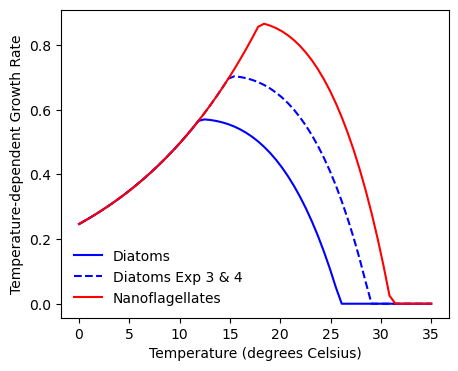

In [12]:
fig,ax=plt.subplots(figsize=(5,4))



plt.plot(t,TdepD,'b-',label='Diatoms')
plt.plot(t,TdepDExp[0],'b--',label='Diatoms Exp 3 & 4')
plt.plot(t,TdepF,'r-',label='Nanoflagellates')
#plt.title('Temperature response of diatoms and flagellates')

ax.set_ylabel('Temperature-dependent Growth Rate')
ax.set_xlabel('Temperature (degrees Celsius)')
ax.legend(frameon=False)

plt.savefig('SuppFigureS3_TempOptima.png', bbox_inches='tight',dpi=1000,transparent=False)